# Нейросети

Для реализации нейросетей используются так называемые нейросетевые фреймворки. Самыми популярными являются:

1. Tensorflow + Keras
2. PyTorch
3. JAX

Мы рассмотрим обучение простейшей нейросети на примере Tensorflow+Keras.

## Распознавание рукописных цифр

Рассмотрим датасет рукописных цифр MNIST.

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"training shape: x = {x_train.shape}, y = {y_train.shape}")
print(f"test shape: x = {x_test.shape}, y = {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
training shape: x = (60000, 28, 28), y = (60000,)
test shape: x = (10000, 28, 28), y = (10000,)


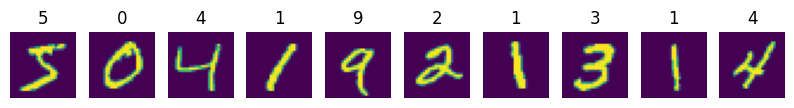

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,10,figsize=(10,3))
for i in range(10):
  ax[i].imshow(x_train[i])
  ax[i].axis('off')
  ax[i].set_title(y_train[i])

Простейшая нейросеть для распознавания рукописных цифр будет состоять из 10 нейронов - по одному на каждую цифру. Архитектура нейросети будет такой:

- Входной слой - 28*28=784 входа
- Линейный (полносвязный, Dense) слой из 10 нейронов
- Выходная функция активации softmax, которая делает из выходного сигнала распределение вероятностей появления той или иной цифры

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Для обучения модели надо задать несколько параметров:

* Используемый алгоритм оптимизации
* Используемую функцию ошибки, которая сопоставляет выходное значение нейросети с ожидаемым результатом. Обычно используются такие функции ошибки:
   - sparse_categorical_crossentropy - для задачи классификации, когда в датасете в качестве результата указан номер класса
   - categorical_crossentropy - для задачи классификации, когда в датасете в качестве результата указано ожидаемое распределение вероятностей
   - mse (Mean Squared Error) для задачи регрессии, если мы предсказываем какой-то численный результат
* Метрику качества. Обычно это:
   - acc (Accuracy) для задач классификации
   - mae (Mean Absolute Error) для задач регрессии

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

Далее запускаем обучение. В нашем случае перед обучением нужно преобразовать входную "форму" датасета из 28x28 к линейным векторам размера 784.

In [ ]:
history = model.fit(x_train.reshape(-1,784),y_train,
                    validation_data=(x_test.reshape(-1,784),y_test),
                    epochs=5,batch_size=16)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.7897 - loss: 16.8927 - val_acc: 0.8955 - val_loss: 6.8439
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.8789 - loss: 7.7885 - val_acc: 0.8868 - val_loss: 7.6842
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.8804 - loss: 7.9014 - val_acc: 0.8736 - val_loss: 7.9265
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.8860 - loss: 7.3713 - val_acc: 0.8849 - val_loss: 7.7059
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.8874 - loss: 7.2757 - val_acc: 0.8786 - val_loss: 8.0072


В объекте `history` сохраняется история метрик в процессе обучения, так что можно построить график:

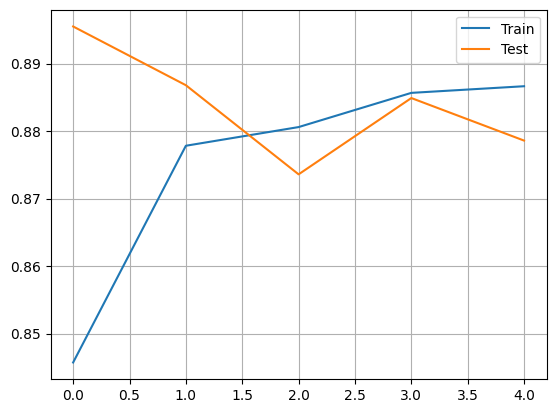

In [ ]:
plt.plot(history.history['acc'],label='Train')
plt.plot(history.history['val_acc'],label='Test')
plt.legend()
plt.grid()
plt.show()

Посмотрим, как модель делает предсказания. Возьмём первые 10 элементов тестовой выборки:

In [ ]:
p = model.predict(x_test[:10].reshape(-1,784))
p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

Для каждой цифры у нас присутствует распределение вероятностей того, какая же это цифра. Чтобы получить номер предскзанной цифры, нужно найти позицию максимального элемента:

In [ ]:
pp = p.argmax(axis=1)
pp

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

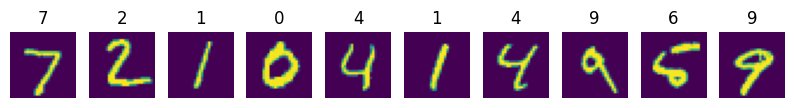

In [ ]:
fig,ax = plt.subplots(1,10,figsize=(10,3))
for i in range(10):
  ax[i].imshow(x_test[i])
  ax[i].axis('off')
  ax[i].set_title(pp[i])

Посмотрим на точность модели на всей тестовой выборке:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy = 0.8786


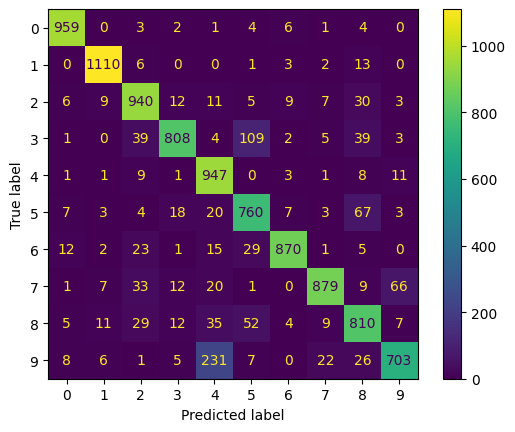

In [ ]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
pred = model.predict(x_test.reshape(-1,784)).argmax(axis=1)
print(f"Accuracy = {accuracy_score(y_test,pred)}")
ConfusionMatrixDisplay.from_predictions(y_test,pred)

Обучим сеть с промежуточным слоем:

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(x_train.reshape(-1,784),y_train,
                    validation_data=(x_test.reshape(-1,784),y_test),
                    epochs=5,batch_size=16)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.7993 - loss: 6.2818 - val_acc: 0.8846 - val_loss: 0.6211
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - acc: 0.8943 - loss: 0.4358 - val_acc: 0.9192 - val_loss: 0.3249
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - acc: 0.9214 - loss: 0.3136 - val_acc: 0.9213 - val_loss: 0.3226
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - acc: 0.9310 - loss: 0.2822 - val_acc: 0.9227 - val_loss: 0.3383
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - acc: 0.9386 - loss: 0.2484 - val_acc: 0.9277 - val_loss: 0.3301


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy = 0.9277


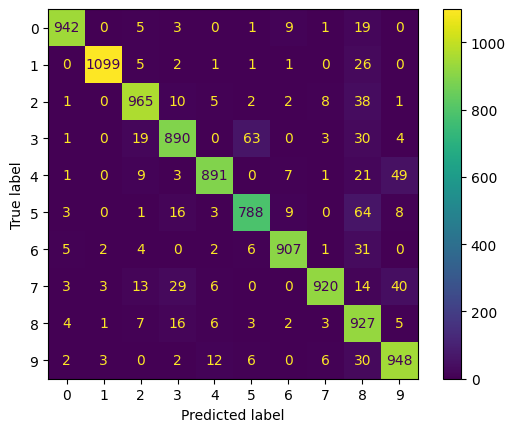

In [ ]:
pred = model.predict(x_test.reshape(-1,784)).argmax(axis=1)
print(f"Accuracy = {accuracy_score(y_test,pred)}")
ConfusionMatrixDisplay.from_predictions(y_test,pred)

## Свёрточные сети

Для работы с изображениями используются свёрточные сети. Они задействую фильтры размером 3x3 или 5x5 пикселей для извлечения паттернов (признаков) из изображений, и тем самым позволяют делать распознавание намного более гибким.

> Такие сети уже достаточно ресурсоёмки в обучении, поэтому в данный момент имеет смысл переключить ноутбук на использование GPU, если Вы ещё этого не сделали.

Посмотрим на сложный датасет изображений CIFAR-10 размером 32x32 пикселя, который уже не получится распознавать обычной сетью:

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<ipython-input-1-238f2b0d83ca>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[i].set_title(classes[int(y_train[i])])


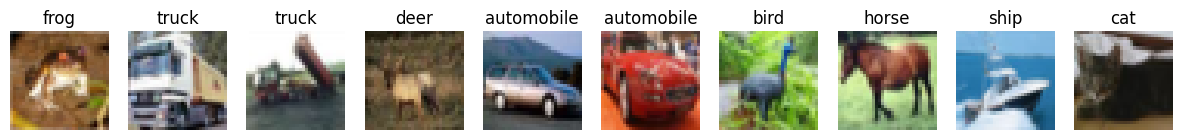

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig,ax = plt.subplots(1,10,figsize=(15,6))
for i in range(10):
  ax[i].imshow(x_train[i])
  ax[i].axis('off')
  ax[i].set_title(classes[int(y_train[i])])
plt.show()

Нейросеть для распознавания таких изображений будет иметь сначала несколько **свёрточных слоёв**, и затем полносвязные слои.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=x_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train/255.0, y_train,
                 validation_data=(x_test/255.0,y_test),
                 epochs=5,batch_size=32)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3435 - loss: 1.7563 - val_accuracy: 0.5961 - val_loss: 1.1209
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6317 - loss: 1.0243 - val_accuracy: 0.6701 - val_loss: 0.9464
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7295 - loss: 0.7724 - val_accuracy: 0.7393 - val_loss: 0.7601
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7875 - loss: 0.6076 - val_accuracy: 0.7377 - val_loss: 0.7907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8315 - loss: 0.4799 - val_accuracy: 0.7516 - val_loss: 0.7865


Посмотрим, насколько хорошо работает распознавание:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


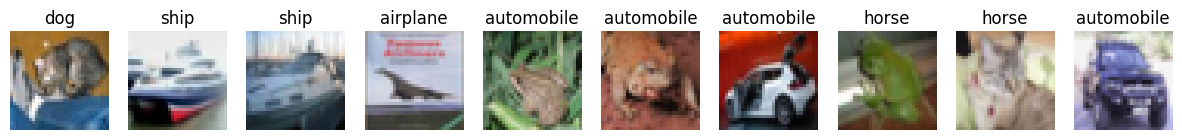

In [ ]:
pred = model.predict(x_test[:10]).argmax(axis=1)

fig,ax = plt.subplots(1,10,figsize=(15,6))
for i in range(10):
  ax[i].imshow(x_test[i])
  ax[i].axis('off')
  ax[i].set_title(classes[int(pred[i])])
plt.show()

## Предобученные сети для работы с изображениями

Много исследований по работе с изображениями проводились на основе датасета ImageNet, который содержит 1.2 миллиона изображений, распределённых по 1000 классам. Обычно при обучении моделей изображения берутся размером 224 на 224 пикселя.

На основе ImageNet было обучено много моделей, которые можно использовать как для классификации, так и для до-обучения своих моделей.

Загрузим изображение котика из интернет:

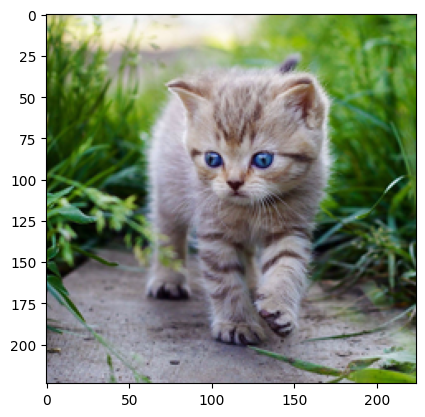

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

def load_img_from_url(url, return_np=True, resize_to=None):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  if resize_to:
    image = image.resize(resize_to,Image.Resampling.LANCZOS)
  return np.array(image) if return_np else image

img = load_img_from_url("https://i.pinimg.com/originals/34/86/eb/3486eb841334095020ea34e2d834a4f0.jpg",resize_to=(224,224))
plt.imshow(img)

Теперь загрузим предобученную модель с архитектурой ResNet50, и применим её к нашему изображению

> Модель принимает на вход набор изображений (тензор размерности Nx224x224x3), и чтобы сделать из одного изображения тензор размерности 1x224x224x3 мы используем функцию `expand_dims`. Также функция `preprocess_input` делает предварительную обработку изображения.  

In [ ]:
resnet = tf.keras.applications.ResNet50()

res = resnet(tf.expand_dims(tf.keras.applications.resnet.preprocess_input(img),0))
res.shape

TensorShape([1, 1000])

Мы получили тензор размерности 1 на 1000 - он содержит вероятности принадлежности изображения к одному из [1000 классов](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/). Посмотрим на эти вероятности:

<BarContainer object of 1000 artists>

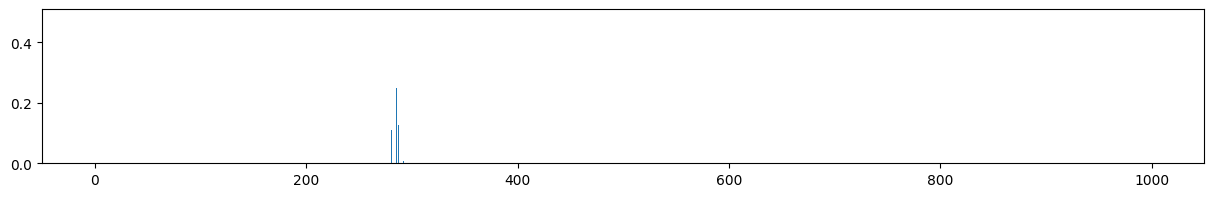

In [ ]:
plt.figure(figsize=(15,2))
plt.bar(range(1000),res[0])

Посмотреть имена top-5 классов вместе с вероятностями мы можем с помощью специальной функции:

In [ ]:
tf.keras.applications.resnet.decode_predictions(res)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02123159', 'tiger_cat', 0.48511294),
  ('n02124075', 'Egyptian_cat', 0.24781989),
  ('n02127052', 'lynx', 0.127179),
  ('n02123045', 'tabby', 0.10927003),
  ('n02129604', 'tiger', 0.0064645614)]]

## До-обучение своей модели распознавания изображений

Для обучения модели на распознавание своих классов изображений, мы можем использовать предобученные модели для извлечения признаков, а обучать только последние слои модели. Такой подход называется **трансферным обучением** (transfer learning).

Научим модель отличать картины от фотографий. Для этого скачаем датасет с Kaggle:

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lyndialu/cyclegan-oilpainting-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.99G/0.99G [00:19<00:00, 53.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lyndialu/cyclegan-oilpainting-dataset/versions/1


Для удобства немного переформатируем датасет на диске, чтобы в нём были директории `train` и `test`, а в каждой из этих директорий - директории `real` и `painting` для фотографий и картин соответственно.

In [ ]:
!mkdir -p data/train data/test
!mv {path}/oil_painting/train* data/train
!mv {path}/oil_painting/test* data/test
!mv data/train/trainA data/train/real
!mv data/train/trainB data/train/painting
!mv data/test/testA data/test/real
!mv data/test/testB data/test/painting

Теперь мы можем загрузить эти изображения для обучения:

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory('data/train',
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory('data/test',
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 6698 files belonging to 2 classes.
Found 1607 files belonging to 2 classes.


Обратите внимание, что мы масштабируем все картинки до размера 224 на 224 пикселей. При этом могут теряться пропорции, что может ухудшить результаты модели.

Посмотрим, как выглядят эти изображения:

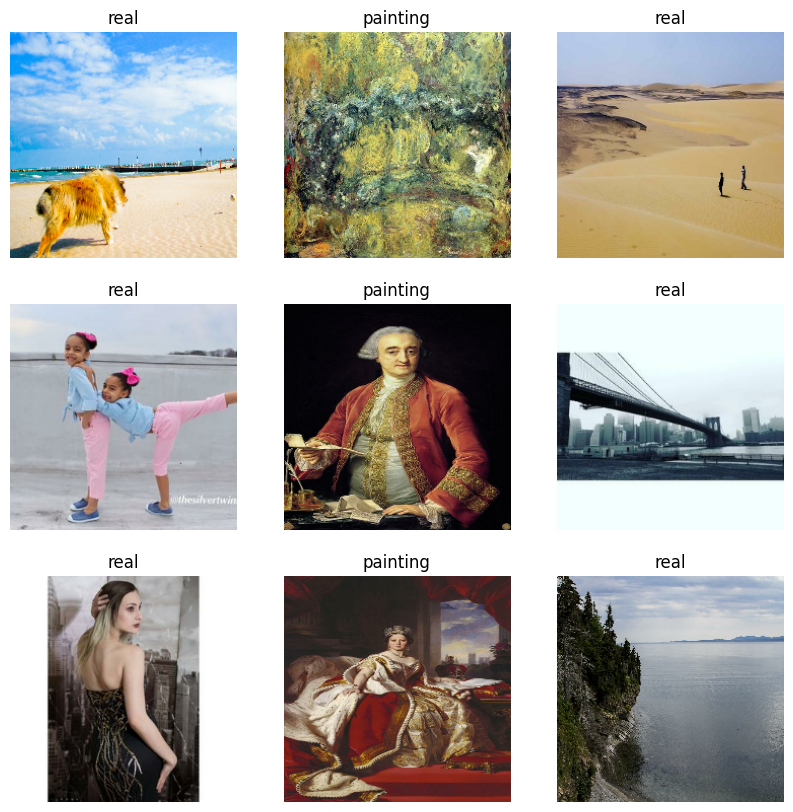

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

В качестве базовой модели будем использовать ResNet. При загрузке флаг `include_top=False` означает, что последние слои нейросети (отвечающие за классификацию) загружены не будут, а будут использоваться только свёрточные слои. Код `resnet.trainable=False` означает, что мы не будем обучать веса resnet, а только последний слой классификатора.

Архитектура сети получается такой:
- Сначала мы применяем функцию `preprocess_input` для предобработки изображения
- Затем извлекаем призанаки с помощью resnet
- Слой `Flatten` превращает признаки (которые представляют собой тензор) в плоский вектор, который можно подать на вход финальному слою
- Последний полносвязный слой - это классификатор

In [ ]:
resnet = tf.keras.applications.ResNet50(include_top=False)
resnet.trainable = False

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Lambda(tf.keras.applications.resnet.preprocess_input),
    resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

Теперь обучим модель и посмотрим на точность:

In [ ]:
hist = model.fit(train_dataset,validation_data=test_dataset,epochs=5)

Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 70s 276ms/step - acc: 0.9109 - loss: 1.3638 - val_acc: 0.9048 - val_loss: 2.8704
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - acc: 0.9823 - loss: 0.3494 - val_acc: 0.9371 - val_loss: 2.4750
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - acc: 0.9927 - loss: 0.1320 - val_acc: 0.9596 - val_loss: 1.8670
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - acc: 0.9903 - loss: 0.2023 - val_acc: 0.9521 - val_loss: 2.9681
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - acc: 0.9946 - loss: 0.0986 - val_acc: 0.9540 - val_loss: 2.8243


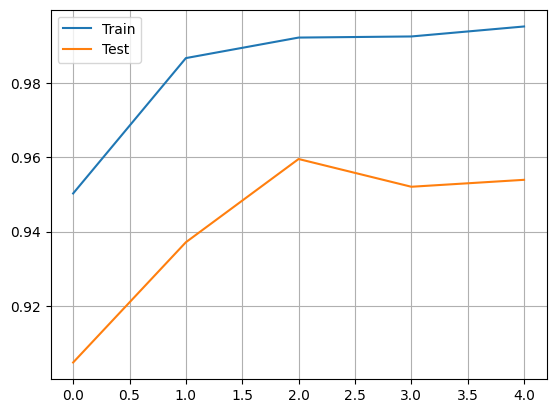

In [ ]:
plt.plot(hist.history['acc'],label='Train')
plt.plot(hist.history['val_acc'],label='Test')
plt.legend()
plt.grid()
plt.show()

Применим модель к каким-нибудь загруженным из интернет изображениям:

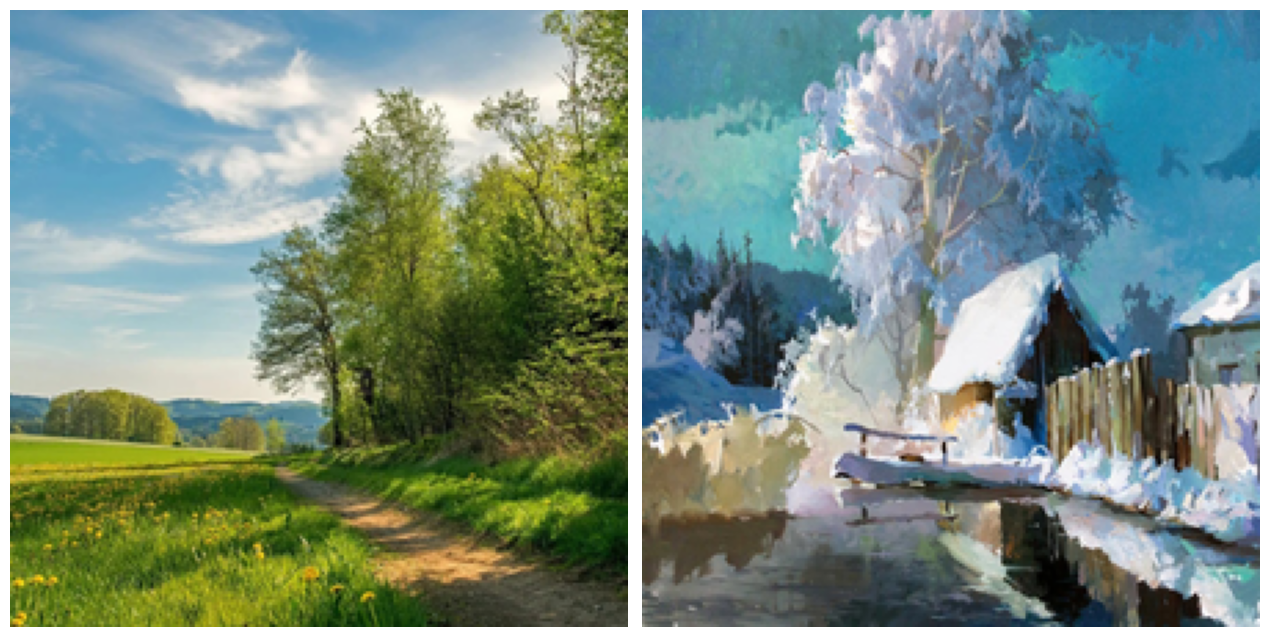

In [ ]:
def display_images(l,titles=None,fontsize=12):
  n=len(l)
  fig,ax = plt.subplots(1,n)
  for i,im in enumerate(l):
    ax[i].imshow(im)
    ax[i].axis('off')
    if titles is not None:
      ax[i].set_title(titles[i],fontsize=fontsize)
  fig.set_size_inches(fig.get_size_inches()*n)
  plt.tight_layout()
  plt.show()

img_real = load_img_from_url("https://avatars.mds.yandex.net/i?id=5596906971607a74a2e0b955b735734b_l-4077629-images-thumbs&n=13",resize_to=(224,224))
img_oil = load_img_from_url("https://i.pinimg.com/originals/a4/46/cf/a446cf302c15fc01bda9d16e6cec4a5d.jpg",resize_to=(224,224))

display_images([img_real,img_oil])

In [ ]:
res = model.predict(np.array([img_real,img_oil]))
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[8.052813e-30, 1.000000e+00],
       [1.000000e+00, 0.000000e+00]], dtype=float32)

Напечаем соответствующие имена классов:

In [ ]:
[class_names[i] for i in res.argmax(axis=1)]

['real', 'painting']

## Распознавание объектов на изображениях (Object Detection)

Для поиска и распознавания объектов на изображениях есть много разных нейросетевых архитектур. Наиболее удобная в использовании - это архитектура YOLO.

Попробуем применить предобученную модель Yolo для распознавания объектов на изображении. Для начала установим необходимую библиотеку:

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 24.3 MB/s eta 0:00:00


Загрузим изображение для экспериментов:

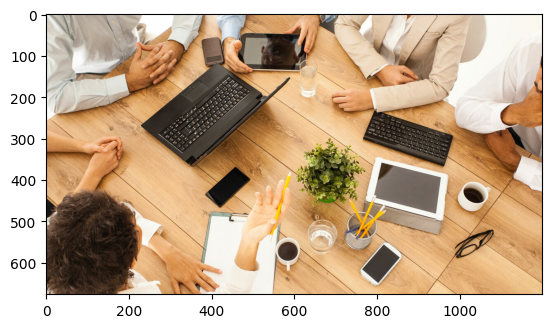

In [ ]:
img = load_img_from_url("https://ucare.timepad.ru/21a7ab72-b7f5-446c-8af8-cf98450e931e/poster_event_1730846.jpg")
plt.imshow(img)

Для поиска объектов определим объект YOLO, и применим его к изображению:

In [ ]:
from ultralytics import YOLO

model = YOLO()
res = model.predict(img)
res


0: 384x640 4 persons, 1 bottle, 3 cups, 1 potted plant, 3 laptops, 1 mouse, 1 keyboard, 2 cell phones, 48.6ms
Speed: 4.5ms preprocess, 48.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

Основная информация о всех найденных объектах содержится в поле `boxes`

In [ ]:
res[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([63., 66., 67., 64., 63., 41.,  0.,  0., 67., 41., 41.,  0., 39., 63., 58.,  0.], device='cuda:0')
conf: tensor([0.9075, 0.8005, 0.7489, 0.5809, 0.4894, 0.4869, 0.4867, 0.4850, 0.4716, 0.4111, 0.3683, 0.3447, 0.3351, 0.3323, 0.2681, 0.2543], device='cuda:0')
data: tensor([[2.2785e+02, 1.1388e+02, 5.8970e+02, 3.6752e+02, 9.0749e-01, 6.3000e+01],
        [7.6609e+02, 2.3340e+02, 9.8525e+02, 3.6731e+02, 8.0049e-01, 6.6000e+01],
        [7.6078e+02, 5.5115e+02, 8.6127e+02, 6.5479e+02, 7.4893e-01, 6.7000e+01],
        [1.0035e+03, 4.0379e+02, 1.0747e+03, 4.6462e+02, 5.8087e-01, 6.4000e+01],
        [7.7094e+02, 3.4438e+02, 9.7161e+02, 5.0393e+02, 4.8940e-01, 6.3000e+01],
        [6.1429e+02, 1.1220e+02, 6.5601e+02, 2.0294e+02, 4.8687e-01, 4.1000e+01],
        [4.1665e+02, 1.1133e+00, 6.6721e+02, 1.4639e+02, 4.8666e-01, 0.0000e+00],
        [0.0000e+00, 4.2447e+02, 2.3121e+02, 6.7232e+02, 4.8502e-01, 0.0000e+00],
        [

В этой информации координаты окружающего прямоугольника (bounding box) для каждого из объектов представлена в нескольких форматах: координаты углов (`xyxy`), координаты угла + размеры (`xywh`), а также эти варианты + номер класса (`xyxyn` и `xywhn`). Также отдельно перечислены номера классов (`cls`), имена классов можно взять в `res.names`.

Для наглядности можем нарисовать все прямоугольники на изображении с помощью удобного объекта `Annotator`

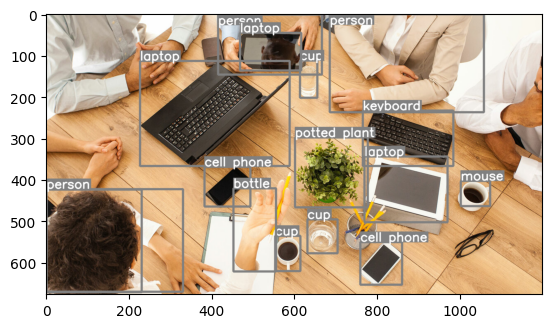

In [ ]:
from ultralytics.utils.plotting import Annotator
for r in res:
  annotator = Annotator(img)
  boxes = r.boxes
  for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])
plt.imshow(img)

YOLO позволяет также обучать свои модели для детекции объектов, однако это потребует размеченного датасета, в котором все объекты отмечены окружающим их прямоугольником с указанием класса. Для разметки объектов можно использовать существующие инструменты:
* [Roboflow](https://roboflow.com/)
* [Label Studio](http://labelstud.io)

## Экосистема HuggingFace

Большое количество моделей на все случаи жизни можно найти на портале [HuggingFace](http://huggingface.co). HuggingFace - это:
- Библиотеки transformers, diffusers, datasets, evaluate для создания моделей на основе самых современных архитектур
- Репозиторий датасетов
- Репозиторий моделей
- Система для запуска моделей в облаке (spaces)

Практически это значит, что на HuggingFace можно найти модели на многие случаи жизни, вместе с примером кода для их использования.

Например, поищем модель для object detection. Например, сразу находится [модель DETR](https://huggingface.co/facebook/detr-resnet-50), и с её странички можно взять пример кода:

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


## Сегментация изображений

Сегментация - это более чёткое выделение объектов на изображении, по контуру. Посмотрим, как работает модель сегментации, на примере обработки видео.

Скачаем видео-файл для примера:

In [ ]:
!wget http://www.soshnikov.com/permanent/data/drive.mp4

--2025-01-19 20:59:26--  http://www.soshnikov.com/permanent/data/drive.mp4
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2848861 (2.7M) [text/plain]
Saving to: ‘drive.mp4’

drive.mp4           100%[===================>]   2.72M   193KB/s    in 15s     

2025-01-19 20:59:41 (185 KB/s) - ‘drive.mp4’ saved [2848861/2848861]



С помощью библиотеку для работы с изображениями OpenCV мы будем по кадрам открывать видео, обнаруживать на нём объекты, наносить их на изображение, и записывать в выходное видео.

In [ ]:
import cv2

from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors

model = YOLO("yolo11n-seg.pt")  # segmentation model
names = model.model.names
cap = cv2.VideoCapture("drive.mp4")
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
out = cv2.VideoWriter("drive-segment.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

while True:
    ret, im0 = cap.read()
    if not ret:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    results = model.predict(im0)
    annotator = Annotator(im0, line_width=3)

    if results[0].masks is not None:
        clss = results[0].boxes.cls.cpu().tolist()
        masks = results[0].masks.xy
        for mask, cls in zip(masks, clss):
            color = colors(int(cls), True)
            txt_color = annotator.get_txt_color(color)
            annotator.seg_bbox(mask=mask, mask_color=color, label=names[int(cls)], txt_color=txt_color)

    out.write(im0)

out.release()
cap.release()


0: 480x640 1 train, 14.0ms
Speed: 1.7ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 train, 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 train, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 train, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 train, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 train, 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.3ms
Speed: 3.0ms preprocess, 10.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 0.4ms postprocess per image at shape (1, 3, 48

## Работаем с лицами на изображении

Распознавание лиц - это отдельная задача, поскольку для людей можно по фотографии определять ряд параметров:
- Пол
- Возраст
- Эмоции
- Расовая принадлежность

Для работы с лицами удобно использовать библиотеку deepface:

In [ ]:
%pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0fca78dff840c9d9d09f170fdd0f5754a9f4e29c2632f411f4750c6b60ca5de1
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


> Возможно, после установки библиотеки придётся перезапустить Google Colab Runtime.

Посмотрим, какие данные выдаст библиотека deepface в ответ на это изображение:

![](https://soshnikov.com/images/official/shwars_casual.jpg)

In [ ]:
from deepface import DeepFace
DeepFace.analyze("https://soshnikov.com/images/official/shwars_casual.jpg",detector_backend='dlib')

Action: age:  25%|██▌       | 1/4 [00:01<00:03,  1.25s/it]    

25-01-19 21:25:47 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:06, 78.1MB/s]
  4%|▍         | 23.6M/539M [00:00<00:05, 102MB/s] 
  7%|▋         | 37.7M/539M [00:00<00:04, 118MB/s]
  9%|▉         | 50.3M/539M [00:00<00:04, 119MB/s]
 12%|█▏        | 62.9M/539M [00:00<00:04, 116MB/s]
 14%|█▍        | 75.0M/539M [00:00<00:04, 98.3MB/s]
 17%|█▋        | 92.3M/539M [00:00<00:03, 119MB/s] 
 19%|█▉        | 105M/539M [00:00<00:03, 117MB/s] 
 22%|██▏       | 117M/539M [00:01<00:04, 101MB/s]
 25%|██▍       | 132M/539M [00:01<00:03, 113MB/s]
 27%|██▋       | 147M/539M [00:01<00:03, 121MB/s]
 30%|██▉       | 160M/539M [00:01<00:03, 105MB/s]
 32%|███▏      | 171M/539M [00:01<00:03, 106MB/s]
 34%|███▍      | 184M/539M [00:01<00:03, 111MB/s]
 36%|███▋      | 196M/539M [00:01<00:03, 112MB/s]
 39%|███▊      | 208M/539M [00:01<00

25-01-19 21:25:55 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:06, 76.2MB/s]
  5%|▍         | 26.7M/537M [00:00<00:04, 116MB/s] 
  7%|▋         | 39.3M/537M [00:00<00:04, 118MB/s]
 10%|▉         | 51.9M/537M [00:00<00:04, 119MB/s]
 12%|█▏        | 64.5M/537M [00:00<00:04, 101MB/s]
 15%|█▍        | 78.6M/537M [00:00<00:04, 112MB/s]
 17%|█▋        | 91.8M/537M [00:00<00:03, 117MB/s]
 20%|█▉        | 105M/537M [00:00<00:04, 105MB/s] 
 22%|██▏       | 117M/537M [00:01<00:04, 102MB/s]
 24%|██▍       | 128M/537M [00:01<00:03, 105MB/s]
 26%|██▋       | 141M/537M [00:01<00:03, 111MB/s]
 29%|██▉       | 155M/537M [00:01<00:03, 117MB/s]
 31%|███       | 167M/537M [00:01<00:03, 116MB/s]
 33%|███▎      | 179M/537M [00:01<00:04, 88.3MB/s]
 36%|███▋      | 195M/537M [00:01<00:03, 105MB/s] 
 39%|███▉      | 210M/537M [00

25-01-19 21:26:03 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:07, 72.3MB/s]
  4%|▍         | 23.1M/537M [00:00<00:05, 95.7MB/s]
  7%|▋         | 37.7M/537M [00:00<00:04, 116MB/s] 
  9%|▉         | 50.3M/537M [00:00<00:04, 118MB/s]
 12%|█▏        | 62.9M/537M [00:00<00:03, 120MB/s]
 14%|█▍        | 75.5M/537M [00:00<00:04, 98.2MB/s]
 16%|█▌        | 86.5M/537M [00:00<00:04, 99.2MB/s]
 18%|█▊        | 97.0M/537M [00:00<00:04, 95.9MB/s]
 21%|██        | 111M/537M [00:01<00:03, 107MB/s]  
 23%|██▎       | 122M/537M [00:01<00:04, 96.1MB/s]
 25%|██▌       | 135M/537M [00:01<00:03, 105MB/s] 
 27%|██▋       | 147M/537M [00:01<00:04, 93.7MB/s]
 30%|██▉       | 160M/537M [00:01<00:03, 103MB/s] 
 32%|███▏      | 175M/537M [00:01<00:03, 113MB/s]
 35%|███▌      | 189M/537M [00:01<00:03, 103MB/s]
 37%|███▋      |

[{'emotion': {'angry': 6.644806963824395,
   'disgust': 77.73155835490724,
   'fear': 12.627600118207917,
   'happy': 0.0024096900998821177,
   'sad': 0.05545401866723375,
   'surprise': 2.619092226732704,
   'neutral': 0.3190726359921532},
  'dominant_emotion': 'disgust',
  'region': {'x': 462,
   'y': 246,
   'w': 321,
   'h': 321,
   'left_eye': (690, 318),
   'right_eye': (565, 327)},
  'face_confidence': 1.0,
  'age': 28,
  'gender': {'Woman': 4.6859861413395265e-05, 'Man': 99.99995231628418},
  'dominant_gender': 'Man',
  'race': {'asian': 0.30246993992477655,
   'indian': 0.2885573310777545,
   'black': 0.040572418947704136,
   'white': 68.4474527835846,
   'middle eastern': 10.336516797542572,
   'latino hispanic': 20.584432780742645},
  'dominant_race': 'white'}]

Как видите, на вход библиотеке можно подавать сразу URL изображения из интернета. Также конечно можно подавать изображение, представленное в виде массива numpy.

## Выводы

Мы рассмотрели некоторое количество предобученных моделей, которые помогут вам решать задачи выделения объектов на изображениях, сегментации и классификации (сортировки) изображений. При этом научились до-обучать модели классификации под свои задачи (и понимаем, что до-обучить object detection и сегментацию тоже возможно). Также мы научились извлекать информацию о человеке по его фотографии.